In [2]:
from __future__ import print_function, division
import unittest
from os.path import join
from os import remove
from nilmtk.datastore import HDFDataStore
from nilmtk import DataSet
from nilmtk.disaggregate import FHMM

import pandas as pd
from pandas import HDFStore

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


In [3]:
from latent_Bayesian_melding import LatentBayesianMelding

In [4]:
filename_meterdata_ukdale = join("/Users/nipunbatra/Downloads/", 'meterdata_ukdale.h5')

In [8]:
%matplotlib inline

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was se

In [5]:
meterdata_ukdale = HDFStore(filename_meterdata_ukdale)

In [11]:
meterdata_ukdale['/meterdata'].head()

,"('laptop computer', 1)","('computer monitor', 1)","('active speaker', 1)","('computer', 1)","('broadband router', 1)","('external hard disk', 1)","('kettle', 1)","('rice cooker', 1)","('running machine', 1)","('laptop computer', 2)","('washing machine', 1)","('dish washer', 1)","('fridge', 1)","('microwave', 1)","('toaster', 1)","('games console', 1)","('modem', 1)","('cooker', 1)",mains,synthetic mains
2013-06-08 00:00:00+01:00,0,0,1,4.701754,2.052632,0.300000,0.280702,0.333333,3.166667,0.000000,1.066667,0.283333,29.250000,0,0.016667,0.300000,3,0,58.117223,45.751754
2013-06-08 00:02:00+01:00,0,0,1,4.733333,2.033333,0.200000,0.333333,0.333333,3.157895,0.070175,1.052632,0.333333,32.000000,0,0.105263,0.315789,3,0,65.959752,48.668421
2013-06-08 00:04:00+01:00,0,0,1,4.649123,2.087719,0.228070,0.298246,0.333333,3.166667,0.033333,1.133333,0.298246,30.508771,0,0.100000,0.300000,3,0,64.443502,47.136842
2013-06-08 00:06:00+01:00,0,0,1,4.300000,2.133333,0.316667,0.333333,0.333333,3.416667,0.033333,1.050000,0.300000,29.633334,0,0.066667,0.245614,3,0,63.058278,46.162281
2013-06-08 00:08:00+01:00,0,0,1,4.298246,2.035088,0.192982,0.333333,0.333333,3.192982,0.052632,1.087719,0.315789,29.052633,0,0.105263,0.300000,3,0,62.140030,45.300001


In [12]:
sample_seconds = 120

In [13]:
building_information = 'ukdale/building2/2013-06-08'

In [14]:
meterdata = meterdata_ukdale['meterdata']

In [16]:
meterdata.head()

,"('laptop computer', 1)","('computer monitor', 1)","('active speaker', 1)","('computer', 1)","('broadband router', 1)","('external hard disk', 1)","('kettle', 1)","('rice cooker', 1)","('running machine', 1)","('laptop computer', 2)","('washing machine', 1)","('dish washer', 1)","('fridge', 1)","('microwave', 1)","('toaster', 1)","('games console', 1)","('modem', 1)","('cooker', 1)",mains,synthetic mains
2013-06-08 00:00:00+01:00,0,0,1,4.701754,2.052632,0.300000,0.280702,0.333333,3.166667,0.000000,1.066667,0.283333,29.250000,0,0.016667,0.300000,3,0,58.117223,45.751754
2013-06-08 00:02:00+01:00,0,0,1,4.733333,2.033333,0.200000,0.333333,0.333333,3.157895,0.070175,1.052632,0.333333,32.000000,0,0.105263,0.315789,3,0,65.959752,48.668421
2013-06-08 00:04:00+01:00,0,0,1,4.649123,2.087719,0.228070,0.298246,0.333333,3.166667,0.033333,1.133333,0.298246,30.508771,0,0.100000,0.300000,3,0,64.443502,47.136842
2013-06-08 00:06:00+01:00,0,0,1,4.300000,2.133333,0.316667,0.333333,0.333333,3.416667,0.033333,1.050000,0.300000,29.633334,0,0.066667,0.245614,3,0,63.058278,46.162281
2013-06-08 00:08:00+01:00,0,0,1,4.298246,2.035088,0.192982,0.333333,0.333333,3.192982,0.052632,1.087719,0.315789,29.052633,0,0.105263,0.300000,3,0,62.140030,45.300001


In [17]:
appliance_map = {'cooker':"('cooker', 1)",
                         'kettle':"('kettle', 1)",
                         'dishwasher':"('dish washer', 1)",
                         'toaster':"('toaster', 1)",
                         'washingmachine':"('washing machine', 1)",
                         'fridgefreezer':"('fridge', 1)", 
                         'microwave':"('microwave', 1)"}

In [18]:
meterlist = ['cooker', 'kettle', 'dishwasher','toaster',
                     'washingmachine','fridgefreezer', 'microwave']

In [19]:
appliancedata = meterdata
groundTruthApplianceReading = pd.DataFrame(index=meterdata.index)

In [21]:
groundTruthApplianceReading.head()

""
2013-06-08 00:00:00+01:00
2013-06-08 00:02:00+01:00
2013-06-08 00:04:00+01:00
2013-06-08 00:06:00+01:00
2013-06-08 00:08:00+01:00


In [22]:
for meter in appliance_map:
    groundTruthApplianceReading[meter] = meterdata[appliance_map[meter]]
    appliancedata = appliancedata.drop(appliance_map[meter],axis=1)    
## the sum of other meter readings which will not be disaggregated
groundTruthApplianceReading['othermeters'] = appliancedata.sum(axis=1)

In [24]:
groundTruthApplianceReading.head()

,fridgefreezer,dishwasher,toaster,cooker,washingmachine,kettle,microwave,othermeters
2013-06-08 00:00:00+01:00,29.250000,0.283333,0.016667,0,1.066667,0.280702,0,118.723363
2013-06-08 00:02:00+01:00,32.000000,0.333333,0.105263,0,1.052632,0.333333,0,129.472033
2013-06-08 00:04:00+01:00,30.508771,0.298246,0.100000,0,1.133333,0.298246,0,126.378589
2013-06-08 00:06:00+01:00,29.633334,0.300000,0.066667,0,1.050000,0.333333,0,123.999507
2013-06-08 00:08:00+01:00,29.052633,0.315789,0.105263,0,1.087719,0.333333,0,121.845294


In [25]:
mains = meterdata['mains']

In [26]:
mains.head()

2013-06-08 00:00:00+01:00    58.117223
2013-06-08 00:02:00+01:00    65.959752
2013-06-08 00:04:00+01:00    64.443502
2013-06-08 00:06:00+01:00    63.058278
2013-06-08 00:08:00+01:00    62.140030
Freq: 120S, Name: mains, dtype: float64

In [27]:
lbm = LatentBayesianMelding()

In [29]:
individual_model = lbm.import_model(meterlist,join('.', 'appliance_model_induced_density.json'))

The trained meter: cooker
The trained meter: kettle
The trained meter: dishwasher
The trained meter: toaster
The trained meter: washingmachine
The trained meter: fridgefreezer
The trained meter: microwave


In [30]:
import time

In [31]:
a = time.time()
results = lbm.disaggregate_chunk(mains)
b = time.time()

/Users/nipunbatra/.local/lib/python2.7/site-packages/mosek/fusion/__init__.py:35823: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if   ((v == None) or (vals == None)):
/Users/nipunbatra/.local/lib/python2.7/site-packages/mosek/fusion/__init__.py:35931: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if   ((mx == None) or (v == None)):
/Users/nipunbatra/.local/lib/python2.7/site-packages/mosek/fusion/__init__.py:35953: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if   ((mx == None) or (v == None)):
/Users/nipunbatra/.local/lib/python2.7/site-packages/mosek/fusion/__init__.py:35320: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if   ((lhs == None) or (rhs == None)):
/Users/nipunbatra/.local/lib/python2.7/site-packages/mosek/fusion/__init__.py:26391: FutureWarning: compari

*************Iteration: 1*****************
Employing the Mosek solver to solve the problem:

Declaring variables and constraints...


 Solving the problem ...

+++++++++++++++optimization status+++++++++++++++++++
Number of variables:62677
Number of constraints:41070
Primal solution status:SolutionStatus.Optimal
Primal value:279.011281317
Dual solution status:SolutionStatus.Optimal
Dual value:279.011217
Accepted solution status:AccSolutionStatus.Anything
+++++++++++++++optimization status+++++++++++++++++++
Solving this problem took '11.1346809864' seconds

 log(datalikelihood*prior)=30701.1653628

*************Iteration: 2*****************
Employing the Mosek solver to solve the problem:

Declaring variables and constraints...


 Solving the problem ...

+++++++++++++++optimization status+++++++++++++++++++
Number of variables:62677
Number of constraints:41070
Primal solution status:SolutionStatus.Optimal
Primal value:279.484336861
Dual solution status:SolutionStatus.Optimal
Dual valu

In [32]:
b-a

46.12233901023865

In [37]:
results['inferred appliance energy'].head()

,cooker,kettle,dishwasher,toaster,washingmachine,fridgefreezer,microwave,inferred mains,mains
2013-06-08 00:00:00+01:00,16.808375,0.003654,5.646171,0.001531,0.008664,0.000124,0.001055,22.469574,58.117223
2013-06-08 00:02:00+01:00,16.811284,0.109192,5.647958,0.006600,0.113186,7.620325,0.003559,30.312103,65.959752
2013-06-08 00:04:00+01:00,15.479611,0.025948,5.554237,0.004360,0.109033,7.619711,0.002954,28.795852,64.443502
2013-06-08 00:06:00+01:00,14.151393,0.025223,5.504124,0.003915,0.104366,7.618822,0.002786,27.410629,63.058278
2013-06-08 00:08:00+01:00,13.278102,0.024389,5.466636,0.003758,0.099159,7.617618,0.002719,26.492380,62.140030


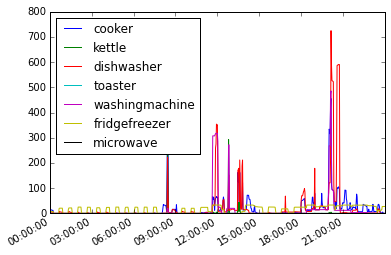

In [40]:
results['inferred appliance energy'][meterlist].plot()

In [44]:
meterdata.columns

Index([u'('laptop computer', 1)', u'('computer monitor', 1)',
       u'('active speaker', 1)', u'('computer', 1)',
       u'('broadband router', 1)', u'('external hard disk', 1)',
       u'('kettle', 1)', u'('rice cooker', 1)', u'('running machine', 1)',
       u'('laptop computer', 2)', u'('washing machine', 1)',
       u'('dish washer', 1)', u'('fridge', 1)', u'('microwave', 1)',
       u'('toaster', 1)', u'('games console', 1)', u'('modem', 1)',
       u'('cooker', 1)', u'mains', u'synthetic mains'],
      dtype='object')

In [96]:
individual_model.keys()

['cooker',
 'kettle',
 'dishwasher',
 'toaster',
 'washingmachine',
 'fridgefreezer',
 'microwave']

In [104]:
individual_model['fridgefreezer'].keys()

[u'numberOfCyclesStats',
 u'induced density of sac',
 u'means',
 u'sac',
 u'startprob',
 u'transprob',
 u'appliance code map',
 'numberOfStates',
 u'sac sample',
 u'induced density of duration']

In [110]:
individual_model['microwave']['induced density of duration']

[13.236, 12.1442903369356]

In [90]:
appliance ="microwave"
pred = results['inferred appliance energy'][appliance]
gt = groundTruthApplianceReading[appliance]

In [91]:
import matplotlib.pyplot as plt
import numpy as np

In [92]:
100*np.abs(pred.sum()-gt.sum())/gt.sum()

99.952865860459838

In [93]:
print (pred.sum(), gt.sum())

1.86353050733 3953.67460934


KeyError: "[('dish washer', 1)] not in index"

In [68]:
groundTruthApplianceReading.head()

,fridgefreezer,dishwasher,toaster,cooker,washingmachine,kettle,microwave,othermeters
2013-06-08 00:00:00+01:00,29.250000,0.283333,0.016667,0,1.066667,0.280702,0,118.723363
2013-06-08 00:02:00+01:00,32.000000,0.333333,0.105263,0,1.052632,0.333333,0,129.472033
2013-06-08 00:04:00+01:00,30.508771,0.298246,0.100000,0,1.133333,0.298246,0,126.378589
2013-06-08 00:06:00+01:00,29.633334,0.300000,0.066667,0,1.050000,0.333333,0,123.999507
2013-06-08 00:08:00+01:00,29.052633,0.315789,0.105263,0,1.087719,0.333333,0,121.845294
